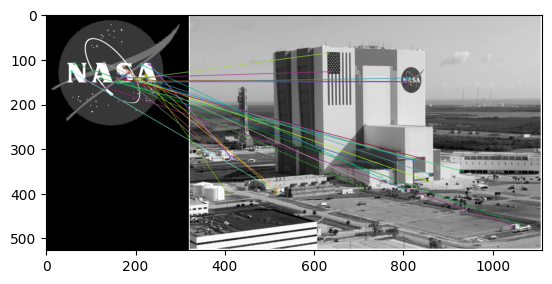

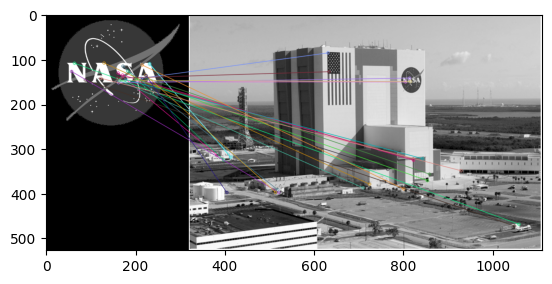

In [14]:
import cv2
from matplotlib import pyplot as plt
# Load the images.
img0 = cv2.imread('coca-cola-logo.png',
                  cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('checkerboard_color.png',
                  cv2.IMREAD_GRAYSCALE)
# Perform ORB feature detection and description.
orb = cv2.ORB_create()
kp0, des0 = orb.detectAndCompute(img0, None)
kp1, des1 = orb.detectAndCompute(img1, None)
# Perform brute-force matching.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des0, des1)
# Sort the matches by distance.
matches = sorted(matches, key=lambda x:x.distance)
# Draw the best 25 matches.
img_matches = cv2.drawMatches(img0, kp0, img1, kp1, matches[:25], img1,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# Show the matches.
plt.imshow(img_matches)
plt.show()

img_matches = cv2.drawMatches(
    img0, kp0, img1, kp1, matches[:25], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# Perform brute-force KNN matching.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
pairs_of_matches = bf.knnMatch(des0, des1, k=2)
pairs_of_matches = sorted(pairs_of_matches, key=lambda x:x[0].distance)
# Show the matches.
plt.imshow(img_matches)
plt.show()

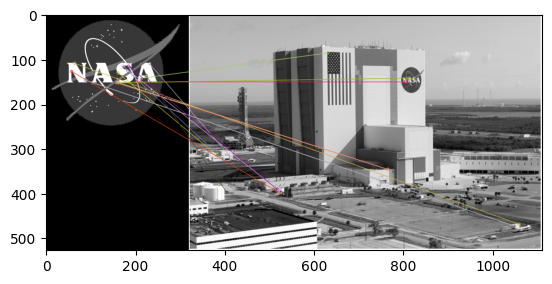

In [18]:
# Apply the ratio test.
matches = [x[0] for x in pairs_of_matches
           if len(x) > 1 and x[0].distance < 0.8 * x[1].distance]
# Draw the best 25 matches.
img_matches = cv2.drawMatches(
    img0, kp0, img1, kp1, matches[:15], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# Show the matches.
plt.imshow(img_matches)
plt.show()

In [21]:
img0 = cv2.imread('file17.png',
                  cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('file18.png',
                  cv2.IMREAD_GRAYSCALE)


# Perform SIFT feature detection and description.
sift = cv2.SIFT_create()
kp0, des0 = sift.detectAndCompute(img0, None)
kp1, des1 = sift.detectAndCompute(img1, None)


# Define FLANN-based matching parameters.
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
# Perform FLANN-based matching.
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des0, des1, k=2)

In [22]:
# Prepare an empty mask to draw good matches.
mask_matches = [[0, 0] for i in range(len(matches))]
# Populate the mask based on David G. Lowe's ratio test.
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        mask_matches[i]=[1, 0]

[< cv2.KeyPoint 000001ED6FF420D0>, < cv2.KeyPoint 000001ED711C6070>, < cv2.KeyPoint 000001ED711C46F0>, < cv2.KeyPoint 000001ED711C43C0>, < cv2.KeyPoint 000001ED711C4780>, < cv2.KeyPoint 000001ED711C49C0>, < cv2.KeyPoint 000001ED711C7D80>, < cv2.KeyPoint 000001ED711C4990>, < cv2.KeyPoint 000001ED711C61C0>, < cv2.KeyPoint 000001ED711C7840>, < cv2.KeyPoint 000001ED7116B690>, < cv2.KeyPoint 000001ED71169770>, < cv2.KeyPoint 000001ED71169620>, < cv2.KeyPoint 000001ED7116B510>, < cv2.KeyPoint 000001ED7116B120>, < cv2.KeyPoint 000001ED71168180>, < cv2.KeyPoint 000001ED7116BE40>, < cv2.KeyPoint 000001ED7116B630>, < cv2.KeyPoint 000001ED7116AF10>, < cv2.KeyPoint 000001ED7116B8A0>, < cv2.KeyPoint 000001ED711F7DE0>, < cv2.KeyPoint 000001ED711F7630>, < cv2.KeyPoint 000001ED624BFBA0>, < cv2.KeyPoint 000001ED73A51710>, < cv2.KeyPoint 000001ED73A53030>, < cv2.KeyPoint 000001ED73A53A80>, < cv2.KeyPoint 000001ED73A537B0>, < cv2.KeyPoint 000001ED73A52E80>, < cv2.KeyPoint 000001ED73A52CD0>, < cv2.KeyPoin

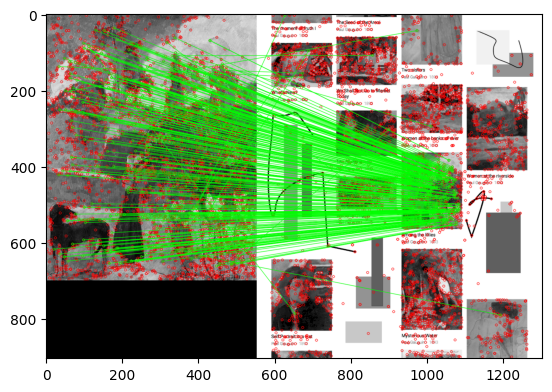

In [28]:
# Draw the matches that passed the ratio test.
img_matches = cv2.drawMatchesKnn(
    img0, kp0, img1, kp1, matches, None,
    
    matchColor=(0, 255, 0), singlePointColor=(255, 0, 0),
    matchesMask=mask_matches, flags=0)
print([i for i in kp0])
# Show the matches.
plt.imshow(img_matches)
plt.show()

In [ ]:
import csv
